<a href="https://colab.research.google.com/github/dishidhak/DS3021Project1/blob/main/DS_3021_Project_1_EDA_and_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1
### Dishitha Dhakshin (qxk8wp)

The goal of the first project is to do some wrangling, EDA, and visualization, and generate sequences of values. We will focus on:

- CDC National Health and Nutritional Examination Survey (NHANES, 1999-2000): https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=1999
- CDC Linked Mortality File (LMF, 1999-2000): https://www.cdc.gov/nchs/data-linkage/mortality-public.htm

NHANES is a rich panel dataset on health and behavior, collected bi-yearly from around 1999 to now. We will focus on the 1999 wave, because that has the largest follow-up window, providing us with the richest mortality data. The mortality data is provided by the CDC Linked Mortality File.

The purpose of the project is to use $k$-NN to predict who dies (hard or soft classification) and how long they live (regression).

# Part 1: Wrangling and EDA (40/100 pts)

First, go to the NHANES and LMF web sites and familiarize yourself with the data sources. Download codebooks. Think about what resources are available. The CDC Linked Mortality File is somewhat of a pain to work with, so I have pre-cleaned it for you. It is available at httts://github.com/ds4e/undergraduate_ml_assignments in the data folder, as `lmf_parsed.cav`. From the CDC LMF web page, get the SAS program to load the data; it is the real codebook.

## Download the demographic data for the 1999--2000 wave from the NHANES page. You can use the following code chunk to merge the LMF and DEMO data:

``` python
import pandas as pd
mdf = pd.read_csv('linked_mortality_file_1999_2000.csv') # Load mortality file
print( mdf.head() )
gdf = pd.read_sas("DEMO.xpt", format="xport") # Load demographics file
print( gdf.head() )
df = gdf.merge(mdf, on="SEQN", how="inner") # Merge mortality and demographics on SEQN variable
```

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
mdf = pd.read_csv('linked_mortality_file_1999_2000.csv') # Load mortality file
print( mdf.head() )
gdf = pd.read_sas("DEMO.xpt", format="xport") # Load demographics file
print( gdf.head() )
df = gdf.merge(mdf, on="SEQN", how="inner") # Merge mortality and demographics on SEQN variable

   SEQN  ELIGSTAT  MORTSTAT  UCOD_LEADING  DIABETES  HYPERTEN  PERMTH_INT  \
0     1         2       NaN           NaN       NaN       NaN         NaN   
1     2         1       1.0           6.0       0.0       0.0       177.0   
2     3         2       NaN           NaN       NaN       NaN         NaN   
3     4         2       NaN           NaN       NaN       NaN         NaN   
4     5         1       0.0           NaN       NaN       NaN       244.0   

   PERMTH_EXM  
0         NaN  
1       177.0  
2         NaN  
3         NaN  
4       244.0  
   SEQN  SDDSRVYR  RIDSTATR  RIDEXMON  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDAGEEX  \
0   1.0       1.0       2.0       2.0       2.0       2.0      29.0      31.0   
1   2.0       1.0       2.0       2.0       1.0      77.0     926.0     926.0   
2   3.0       1.0       2.0       1.0       2.0      10.0     125.0     126.0   
3   4.0       1.0       2.0       2.0       1.0       1.0      22.0      23.0   
4   5.0       1.0       2.0       2.

## The variables `ELIGSTAT`, `MORTSTAT`, `PERMTH_INT`, and `RIDAGEEX` are particularly important. Look them up in the documentation and clearly describe them. (5/100 pts.)

`ELIGSTAT` - *Eligibility Status for Mortality Follow-up*

This variable conveys whether or not the survey participant was eligible for mortality linkage or not.

 1 = Participant was eligible for mortality linkage

 2 = Participant was under 18 and not eligible for public release

 3 = Participant was not linkage eligible because of insufficient identifying data

`MORTSTAT` - *Final Mortality Status*

This variable indicates the final vital status of those who were linkage eligible with ELIGSTAT. Those who were not linkage eligible were coded as a numeric missing value.

 0 = Assumed alive

 1 = Assumed deceased

`PERMTH_INT` - *Number of Person-Months of Follow-up from NHANES Interview Date*

This variable indicates the number of months from the interview to the date of death or the end of the mortality period. The number of months was recorded as an integer value.


`RIDAGEEX` - *Age in months*

This variable indicates the age in months at MEC examination for individuals under 85 years of age at screening.

## Second, the goal of the project is to use whatever demographic, behavioral, and health data you like to predict mortality (`MORTSTAT`) and life expectancy (`PERMTH_INT`). Go to the NHANES 1999--2000 web page and select your data and download it. Clearly explain your rationale for selecting these data. Use `.merge` to combine your data into one complete dataframe. Document missing values. (5/100 pts)

The variables I am analyzing in my project are:

### `RIAGENDR` - *Gender*

1 = Male

2 = Female

There are no missing values for this variable.


### `DMDCITZN` - *Citizenship Status*

1 = Citizen of the US by birth or naturalization

2 = Not a citizen of the US

7 = Refused

9 = Don't Know

. = Missing

30 participants refused to answer, 29 did not know of their citizenship status, and there are 3 missing values.


### `HID010` - *Health Insurance*

This variable indicates whether or not the participant is covered by health insurance.

1 = Yes

2 = No

7 = Refused

9 = Don't Know

. = Missing

4 participants refused to answer, 26 did not know whether or not they were covered by health insurance, and there are 161 missing values.




### Rationale for Selecting These Data

Gender is included because mortality patterns differ systematically between males and females. Biological differences and social gender disparities contribute to well-documented variations in life expectancy and mortality risk.

Citizenship status is included as a structural socioeconomic indicator. Citizenship may influence access to employment opportunities, public benefits, healthcare eligibility, and social integration. Differences in legal and social status can contribute to disparities in health outcomes and mortality risk.

Health insurance coverage is included as a larger indicator of access to health services. Individuals without insurance often delay or avoid medical treatment, preventive care, and chronic disease management, all of which can increase mortality risk and reduce life expectancy.

### DataFrame Merging and Data Cleaning

In [6]:
# Load health insurance file
hiq = pd.read_sas("HIQ.xpt", format="xport")

# Keep only SEQN and insurance variable
hiq_small = hiq[["SEQN", "HID010"]]

# Merge into main dataframe
df = df.merge(hiq_small, on="SEQN", how="left")

df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,WTIREP51,WTIREP52,ELIGSTAT,MORTSTAT,UCOD_LEADING,DIABETES,HYPERTEN,PERMTH_INT,PERMTH_EXM,HID010
0,1.0,1.0,2.0,2.0,2.0,2.0,29.0,31.0,4.0,2.0,...,9809.165049,10323.315747,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2.0,1.0,2.0,2.0,1.0,77.0,926.0,926.0,3.0,1.0,...,27406.383620,26984.812909,1,1.0,6.0,0.0,0.0,177.0,177.0,1.0
2,3.0,1.0,2.0,1.0,2.0,10.0,125.0,126.0,3.0,1.0,...,45389.112766,43781.905637,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,4.0,1.0,2.0,2.0,1.0,1.0,22.0,23.0,4.0,2.0,...,10564.981435,11012.529729,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,5.0,1.0,2.0,2.0,1.0,49.0,597.0,597.0,3.0,1.0,...,94282.855382,91993.251203,1,0.0,NaN,NaN,NaN,244.0,244.0,1.0


In [7]:
df_subset = df[[ # Subsetting only relevant variables
    "SEQN",
    "ELIGSTAT",
    "MORTSTAT",
    "PERMTH_INT",
    "RIDAGEEX",
    "RIAGENDR",
    "DMDCITZN",
    "HID010"
]]

df_subset.head()

,SEQN,ELIGSTAT,MORTSTAT,PERMTH_INT,RIDAGEEX,RIAGENDR,DMDCITZN,HID010
0,1.0,2,NaN,NaN,31.0,2.0,1.0,1.0
1,2.0,1,1.0,177.0,926.0,1.0,1.0,1.0
2,3.0,2,NaN,NaN,126.0,2.0,2.0,1.0
3,4.0,2,NaN,NaN,23.0,1.0,1.0,1.0
4,5.0,1,0.0,244.0,597.0,1.0,1.0,1.0


In [8]:
df_subset.isna().sum() # Documenting missing values

,0
SEQN,0
ELIGSTAT,0
MORTSTAT,4520
PERMTH_INT,4520
RIDAGEEX,824
RIAGENDR,0
DMDCITZN,3
HID010,161


In [9]:
df_subset.isna().mean() # Documenting missing values

,0
SEQN,0.000000
ELIGSTAT,0.000000
MORTSTAT,0.453588
PERMTH_INT,0.453588
RIDAGEEX,0.082689
RIAGENDR,0.000000
DMDCITZN,0.000301
HID010,0.016157


In [10]:
df_subset = df_subset[df_subset["ELIGSTAT"] == 1] # Restricting to only eligible participants

df_subset.isna().sum()

,0
SEQN,0
ELIGSTAT,0
MORTSTAT,0
PERMTH_INT,0
RIDAGEEX,605
RIAGENDR,0
DMDCITZN,2
HID010,93


In [11]:
# 'Refused' and 'Don't Know' considered missing values
# Citizenship: keep only 1 and 2
df_subset.loc[~df_subset["DMDCITZN"].isin([1, 2]), "DMDCITZN"] = pd.NA

# Insurance: keep only 1 and 2
df_subset.loc[~df_subset["HID010"].isin([1, 2]), "HID010"] = pd.NA

df_subset.isna().sum()

,0
SEQN,0
ELIGSTAT,0
MORTSTAT,0
PERMTH_INT,0
RIDAGEEX,605
RIAGENDR,0
DMDCITZN,41
HID010,112


In [12]:
model_df = df_subset.dropna() # Drop missing values

model_df.shape

(4733, 8)

In [13]:
model_df.isna().sum() # Checking to see that there are no more missing values

,0
SEQN,0
ELIGSTAT,0
MORTSTAT,0
PERMTH_INT,0
RIDAGEEX,0
RIAGENDR,0
DMDCITZN,0
HID010,0


After merging the demographic, mortality, and health insurance datasets using the participant identifier (SEQN), missing values were examined across all relevant variables. Prior to restriction, mortality variables contained substantial missingness due to ineligible participants. The dataset was restricted to individuals eligible for mortality linkage (ELIGSTAT = 1), eliminating missing mortality outcomes. Remaining missingness was observed in age (RIDAGEEX: 605 observations), citizenship status (DMDCITZN: 41 observations), and health insurance coverage (HID010: 112 observations). Responses coded as “Refused” or “Don’t know” were recoded as missing. A complete-case analysis was then performed, resulting in a final analytic sample of 4,733 participants with no remaining missing values.

## Third, do basic EDA and visualization of the key variables. Are any important variables skewed? Are there outliers? How correlated are pairs of variables? Do pairs of categorical variables exhibit interesting patterns in contingency tables? Provide a clear discussion and examination of the data and the variables you are interested in using.

In [14]:
model_df[["RIDAGEEX", "PERMTH_INT"]].describe() # Describe table for the only two continuous variables

,RIDAGEEX,PERMTH_INT
count,4733.000000,4733.000000
mean,554.310374,209.025776
std,234.912491,60.556769
min,216.000000,1.000000
25%,346.000000,222.000000
50%,531.000000,236.000000
75%,758.000000,243.000000
max,1019.000000,250.000000


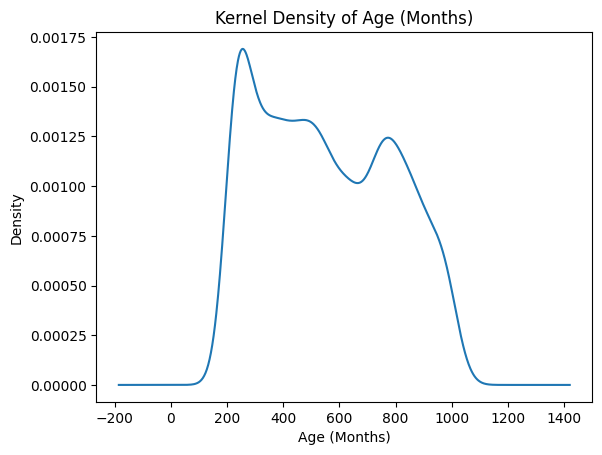

In [15]:
model_df["RIDAGEEX"].plot(kind="kde")
plt.title("Kernel Density of Age (Months)")
plt.xlabel("Age (Months)")
plt.show()

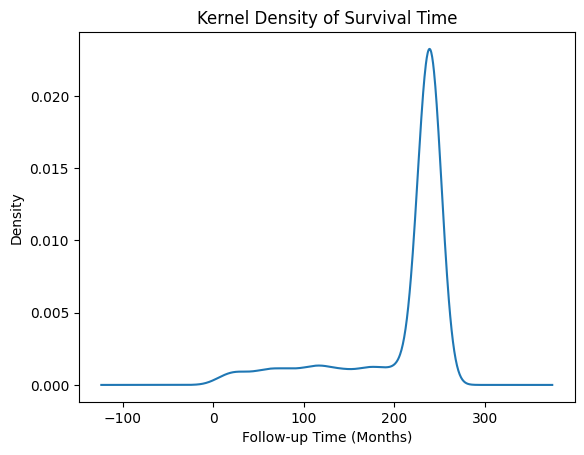

In [16]:
model_df["PERMTH_INT"].plot(kind="kde")
plt.title("Kernel Density of Survival Time")
plt.xlabel("Follow-up Time (Months)")
plt.show()

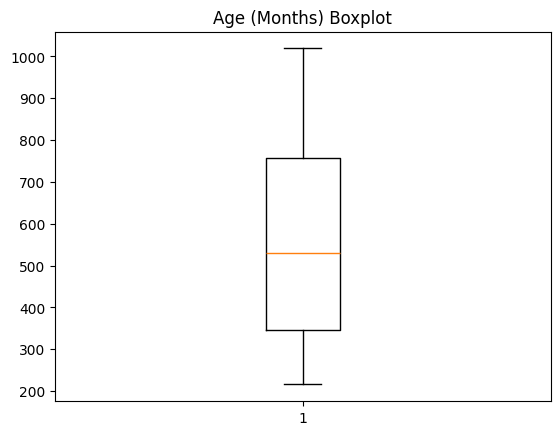

In [17]:
plt.boxplot(model_df["RIDAGEEX"])
plt.title("Age (Months) Boxplot")
plt.show()

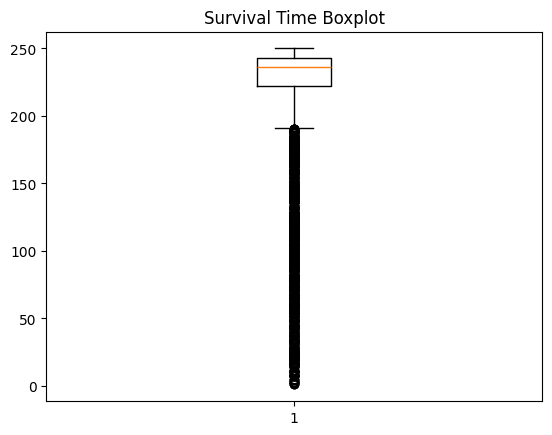

In [18]:
plt.boxplot(model_df["PERMTH_INT"])
plt.title("Survival Time Boxplot")
plt.show()

In [19]:
model_df[["RIDAGEEX", "PERMTH_INT"]].corr()

,RIDAGEEX,PERMTH_INT
RIDAGEEX,1.00000,-0.55954
PERMTH_INT,-0.55954,1.00000


In [20]:
model_df[["RIDAGEEX", "PERMTH_INT"]].corr()

,RIDAGEEX,PERMTH_INT
RIDAGEEX,1.00000,-0.55954
PERMTH_INT,-0.55954,1.00000


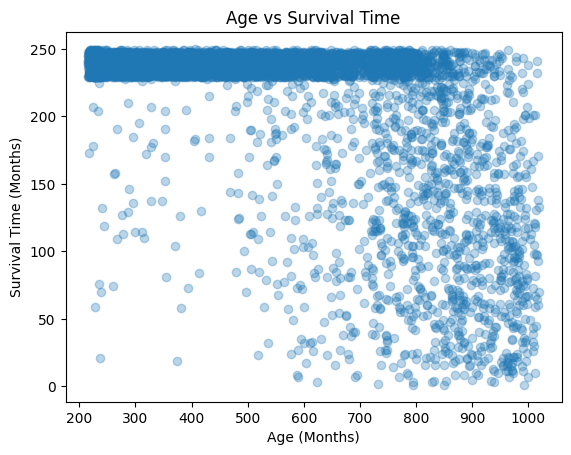

In [21]:
plt.scatter(model_df["RIDAGEEX"], model_df["PERMTH_INT"], alpha=0.3)
plt.xlabel("Age (Months)")
plt.ylabel("Survival Time (Months)")
plt.title("Age vs Survival Time")
plt.show()

In [22]:
pd.crosstab(model_df["RIAGENDR"],
            model_df["MORTSTAT"],
            normalize="index")

MORTSTAT,0.0,1.0
RIAGENDR,,
1.0,0.679313,0.320687
2.0,0.766574,0.233426


In [23]:
pd.crosstab(model_df["HID010"],
            model_df["MORTSTAT"],
            normalize="index")

MORTSTAT,0.0,1.0
HID010,,
1.0,0.683122,0.316878
2.0,0.865402,0.134598


In [24]:
pd.crosstab(model_df["DMDCITZN"],
            model_df["MORTSTAT"],
            normalize="index")

MORTSTAT,0.0,1.0
DMDCITZN,,
1.0,0.697415,0.302585
2.0,0.867853,0.132147


In [25]:
pd.crosstab(model_df["DMDCITZN"],
            model_df["MORTSTAT"],
            normalize="index")

MORTSTAT,0.0,1.0
DMDCITZN,,
1.0,0.697415,0.302585
2.0,0.867853,0.132147


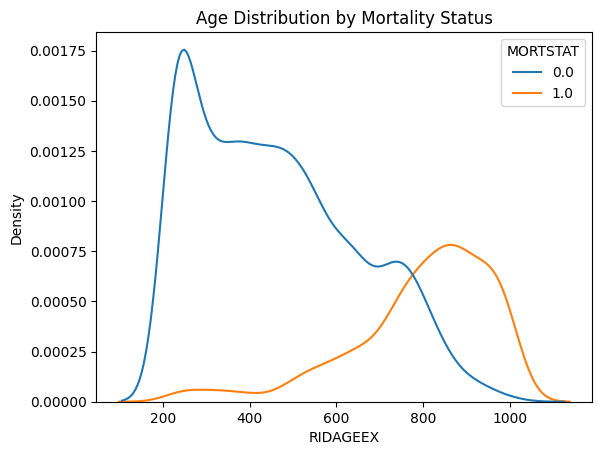

In [26]:
sns.kdeplot(data=model_df, x="RIDAGEEX", hue="MORTSTAT")
plt.title("Age Distribution by Mortality Status")
plt.show()

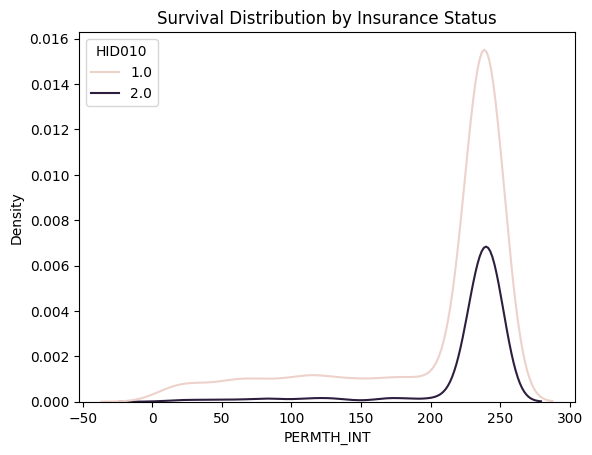

In [27]:
sns.kdeplot(data=model_df, x="PERMTH_INT", hue="HID010")
plt.title("Survival Distribution by Insurance Status")
plt.show()

### Basic EDA Discussion and Examination

### Are any variables skewed?

- Age is mildly right-skewed, but it is not extreme.
- Survival time in months has a strong right skew. There is a large spike near maximum follow-up (~240–250 months). Many lower survival times (early deaths and heavy clustering at the upper bound due to the study cutting off around 250 months after.

### Are there any outliers?

The boxplots do not indicate any problematic outliers in age. The upper age values reflect expected older participants rather than data errors. Survival time displays several points outside the lower whisker; however, these represent legitimate early mortality events rather than erroneous values. Therefore, no outliers were removed from the analysis.


### How correlated are pairs of variables?

The correlation between age (RIDAGEEX) and survival time (PERMTH_INT) is -0.56, indicating a moderately strong negative association. This suggests that individuals who are older at baseline tend to have shorter follow-up survival times. No other continuous variable pairs are present in the model, so this is the only meaningful Pearson correlation evaluated.

### Do pairs of categorical variables exhibit interesting patterns in contingency tables?

In the contingency analysis, males exhibited a higher mortality proportion (approximately 32%) compared to females (approximately 23%). This pattern is consistent with established demographic trends showing higher mortality rates and lower life expectancy among males. Gender, therefore,fore appears to be a meaningful predictor of mortality in the dataset.

Citizenship status is coded as citizen (1) and non-citizen (2). The contingency table shows higher mortality among citizens compared to non-citizens. However, this difference is likely influenced by age composition, as citizens in the sample may be older on average than non-citizens. Thus, while a pattern exists, it may reflect demographic structure rather than a direct effect of citizenship on mortality.

Health insurance coverage is coded as insured (1) and uninsured (2). Mortality proportions appear higher among insured individuals compared to uninsured individuals. This pattern likely reflects age-related confounding, as older individuals are more likely to have insurance coverage (e.g., Medicare) and also have higher mortality risk. Therefore, the observed association may not represent a causal relationship but rather underlying age differences.


# Part 2: $k$-NN classification/regression, write-up (50/100 pts)

Submit a notebook that clearly addresses the following, using code and markdown chunks:

## 1. Describe the data, particularly what an observation is and whether there are any missing data that might impact your analysis. Who collected the data and why? What known limitations are there to analysis? (10/100 pts)

The data used in this project comes from the National Health and Nutrition Examination Survey (NHANES). It was collected for the 1999-2000 wave by the National Center for Health Statistics (NCHS), which is a subsidiary of the Centers for Disease Control and Prevention (CDC). NHANES is a nationally representative survey of the U.S. civilian, non-institutionalized population designed to assess health status, nutritional behavior, and disease prevalence. The survey combines interviews, physical examinations, and laboratory testing.

NHANES is designed to monitor population health, identify risk factors for disease, and inform public health policy. The Linked Mortality File enables long-term evaluation of health outcomes, allowing researchers to examine how demographic and structural characteristics relate to mortality risk.

Mortality outcomes were obtained from the CDC Linked Mortality File (LMF), which links NHANES participants to the National Death Index to determine mortality status and follow-up time. This linkage allows researchers to examine long-term survival outcomes following the baseline survey.

An observation in this dataset represents a single individual who participated in the NHANES 1999–2000 survey and was eligible for mortality linkage (ELIGSTAT = 1). Each row corresponds to one participant and includes demographic characteristics, structural indicators (citizenship and insurance status), and mortality outcomes.

Limitations to analysis include missing data, self-reporting, cutoff in survival time, and observational design.

Initial inspection revealed missing mortality outcomes for individuals ineligible for mortality linkage. To ensure valid outcome measurement, the analysis was restricted to participants with ELIGSTAT = 1. After this restriction, mortality variables (MORTSTAT and PERMTH_INT) had no missing values.
Minor missingness remained in predictor variables:
Age in months (RIDAGEEX) due to exam non-completion or top-coding.
Health insurance status (HID010) due to nonresponse.
Citizenship status (DMDCITZN) in a very small number of cases.
Observations with missing predictor values were excluded using complete-case analysis. The final analytic sample included 4,779 participants.

Variables like citizenship status and insurance status were self-reported and are subject to reporting bias. This study also only looked at a non-institutionalized population (those in nursing homes, mental health facilities, and such would be excluded), which hinders generalizability.

## 2. Describe the variables you selected to predict mortality and life expectancy, and the rationale behind them. Analyze your variables using describe tables, kernel densities, scatter plots, and conditional kernel densities. Are there any patterns of interest to notice? (10/100 pts)

### Variables and Rationale:

The variables I selected to predict mortality and life expentancy are Age in months (`RIDAGEEX`), Gender (`RIAGENDR`), Citizenship Status (`DMDCITZN`), and Health Insurance (`HID010`).

Age is included as a fundamental biological determinant of mortality risk. Mortality risk increases systematically with age due to cumulative physiological decline and increased prevalence of chronic disease. Age serves as a baseline predictor and allows for meaningful interpretation of demographic and structural differences in survival outcomes.

Gender is included because mortality patterns differ systematically between males and females. Biological differences and social gender disparities contribute to well-documented variations in life expectancy and mortality risk.

Citizenship status is included as a structural socioeconomic indicator. Citizenship may influence access to employment opportunities, public benefits, healthcare eligibility, and social integration. Differences in legal and social status can contribute to disparities in health outcomes and mortality risk.

Health insurance coverage is included as a larger indicator of access to health services. Individuals without insurance often delay or avoid medical treatment, preventive care, and chronic disease management, all of which can increase mortality risk and reduce life expectancy.

**Variable analysis using describe tables, kernel densities, scatter plots, conditional kernal densities, etc. were conducted in Part 1! Please scroll up to see.**

### Patterns of Interest

First, age shows a strong relationship with mortality. The conditional kernel density plot demonstrates that individuals who died are concentrated at substantially higher ages compared to those who survived. The correlation between age and survival time is moderately negative (approximately −0.56), indicating that older individuals tend to have shorter follow-up survival periods.

Second, gender exhibits a clear mortality difference. Males show a higher proportion of mortality compared to females, consistent with well-established demographic patterns in life expectancy.
Third, health insurance status displays an interesting but potentially confounded pattern. Insured individuals show higher mortality proportions than uninsured individuals; however, this likely reflects age composition differences, as older individuals are more likely to be insured (e.g., Medicare eligibility).

Finally, citizenship status shows mortality differences between citizens and non-citizens, but this pattern may also reflect demographic composition rather than a direct causal relationship.

Overall, age appears to be the strongest predictor in the dataset, while insurance and citizenship effects may be partially mediated through age structure.



## 3. Using your variables to predict mortality using a $k$-Nearest Neighbor Classifier. Analyze its performance and explain clearly how you select $k$. (10/100 pts)

In [28]:
# Predict mortality (0 = alive, 1 = deceased)
X = model_df[["RIDAGEEX", "RIAGENDR", "DMDCITZN", "HID010"]]
y = model_df["MORTSTAT"]

In [29]:
from sklearn.model_selection import train_test_split

# Split into 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [30]:
from sklearn.preprocessing import StandardScaler

# Standardize predictors so age does not dominate distance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Try k from 1 to 30
k_values = range(1, 31)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    cv_scores.append(scores.mean())

# Select k with highest cross-validated accuracy
best_k = k_values[np.argmax(cv_scores)]
best_k

18

In [32]:
# Train kNN with optimal k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

# Predict mortality on test set
y_pred = knn.predict(X_test_scaled)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Overall accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Precision, recall, F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8605633802816901
Confusion Matrix:
 [[977  52]
 [146 245]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1029
         1.0       0.82      0.63      0.71       391

    accuracy                           0.86      1420
   macro avg       0.85      0.79      0.81      1420
weighted avg       0.86      0.86      0.85      1420



To predict mortality, I implemented a k-Nearest Neighbor classifier using age, gender, citizenship status, and health insurance status as predictors. The optimal value of k=18 was selected using 5-fold cross-validation, balancing bias and variance. The final model achieved an accuracy of 86.1% on the test set. Performance was strongest for predicting survival (recall = 0.95), while recall for mortality was lower (0.63), indicating that some deaths were misclassified as survivors. This imbalance likely reflects the greater prevalence of survivors in the dataset and the strong influence of age on classification performance.

## 4. Using your variables to predict life expectancy using a $k$-Nearest Neighbor Regressor. Analyze its performance and explain clearly how you select $k$. (10/100 pts)

In [34]:
# Predict survival time (life expectancy proxy)
X = model_df[["RIDAGEEX", "RIAGENDR", "DMDCITZN", "HID010"]]
y = model_df["PERMTH_INT"]

In [35]:
from sklearn.model_selection import train_test_split

# 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [36]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Try k from 1 to 30
k_values = range(1, 31)
cv_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train,
                             cv=5, scoring="neg_mean_squared_error")
    cv_scores.append(scores.mean())

# Choose k with lowest MSE (highest negative score)
best_k = k_values[np.argmax(cv_scores)]
best_k

19

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Try k from 1 to 30
k_values = range(1, 31)
cv_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train,
                             cv=5, scoring="neg_mean_squared_error")
    cv_scores.append(scores.mean())

# Choose k with lowest MSE (highest negative score)
best_k = k_values[np.argmax(cv_scores)]
best_k

19

In [39]:
# Train final model
knn_reg = KNeighborsRegressor(n_neighbors=best_k)
knn_reg.fit(X_train_scaled, y_train)

# Predict survival time
y_pred = knn_reg.predict(X_test_scaled)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

MSE: 2138.903246069213
RMSE: 46.24827830383757
R^2: 0.41123284588704834


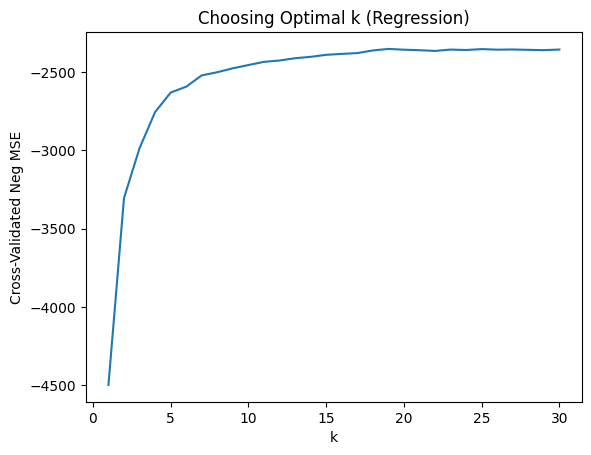

In [41]:
import matplotlib.pyplot as plt

plt.plot(k_values, cv_scores)
plt.xlabel("k")
plt.ylabel("Cross-Validated Neg MSE")
plt.title("Choosing Optimal k (Regression)")
plt.show()

To predict life expectancy, measured as follow-up survival time (PERMTH_INT), I implemented a k-Nearest Neighbor regressor using age, gender, citizenship status, and health insurance coverage as predictors. The optimal value of k=19 was selected using 5-fold cross-validation by minimizing mean squared error. The final model achieved an RMSE of 46.25 months and an R² of 0.41 on the test set. This indicates that the model explains approximately 41% of the variation in survival time, with an average prediction error of about 3.8 years. Age appears to be the dominant predictor, while categorical variables contribute additional but limited explanatory power.

## 5. Describe how your model could be used for health interventions based on patient characteristics. Are there any limitations or risks to consider? (10/100 pts)

The mortality classifier and life expectancy regressor could be used as preliminary risk stratification tools in public health settings. By using patient characteristics such as age, gender, citizenship status, and health insurance coverage, the model can identify individuals who may be at elevated risk of mortality or shorter survival. For example, older individuals predicted to have shorter survival times could be prioritized for preventive screenings, chronic disease management programs, or targeted health outreach initiatives. Similarly, demographic groups exhibiting higher predicted mortality risk could receive increased monitoring or community-based interventions.

In practice, such models could support population-level planning rather than individual clinical decision-making. Health agencies might use aggregated risk predictions to allocate resources more efficiently, design age-targeted programs, or evaluate disparities in access to care.

However, there are important limitations and risks. First, the model relies heavily on age, which dominates predictive performance. This means the model may add limited value beyond basic demographic risk assessment. Second, k-Nearest Neighbor methods are sensitive to class imbalance and may under-detect mortality cases, as seen in the lower recall for deceased individuals. Third, survival time in the dataset is right-censored, meaning many individuals were still alive at the end of follow-up. kNN regression does not explicitly account for censoring, which may reduce the validity of life expectancy predictions.

Additionally, including variables such as citizenship status and insurance coverage raises ethical concerns. These variables may reflect structural inequalities rather than biological risk. Using them without caution could unintentionally reinforce disparities or contribute to biased resource allocation. Predictions should therefore be interpreted as indicators of structural vulnerability rather than inherent individual risk.
Finally, predictive models should not replace clinical judgment. They are best used as decision-support tools that complement, rather than substitute for, professional evaluation.